In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
#
# Import Keras modules
#
from keras import models
from keras import layers
from keras.utils import to_categorical

In [2]:
# Load the iris dataset
#
iris = datasets.load_iris()
X = iris.data
y = iris.target
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
#
# Create categorical labels
#
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)
#

In [8]:
#
# Create the network
#
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(4,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
#
# Compile the network
#
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## Fit the neural network
history = model.fit(X_train, train_labels, validation_split=0.2 ,epochs=20, batch_size=40)

Epoch 1/20
3/3 [==============================] - 0s 51ms/step - loss: 1.0773 - accuracy: 0.3690 - val_loss: 1.0154 - val_accuracy: 0.5238
Epoch 2/20
3/3 [==============================] - 0s 5ms/step - loss: 0.9134 - accuracy: 0.6310 - val_loss: 0.9143 - val_accuracy: 0.5714
Epoch 3/20
3/3 [==============================] - 0s 7ms/step - loss: 0.8139 - accuracy: 0.6905 - val_loss: 0.7971 - val_accuracy: 0.5714
Epoch 4/20
3/3 [==============================] - 0s 8ms/step - loss: 0.7399 - accuracy: 0.6905 - val_loss: 0.7483 - val_accuracy: 0.5714
Epoch 5/20
3/3 [==============================] - 0s 8ms/step - loss: 0.6770 - accuracy: 0.6905 - val_loss: 0.7599 - val_accuracy: 0.5714
Epoch 6/20
3/3 [==============================] - 0s 9ms/step - loss: 0.6659 - accuracy: 0.6905 - val_loss: 0.7719 - val_accuracy: 0.5714
Epoch 7/20
3/3 [==============================] - 0s 7ms/step - loss: 0.6383 - accuracy: 0.6905 - val_loss: 0.7139 - val_accuracy: 0.5714
Epoch 8/20
3/3 [=================

In [16]:
# Get the accuracy of test data set
test_loss, test_acc = model.evaluate(X_test, test_labels)

2/2 [==============================] - 0s 0s/step - loss: 0.3144 - accuracy: 0.9778


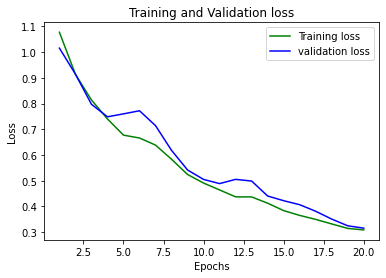

In [26]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

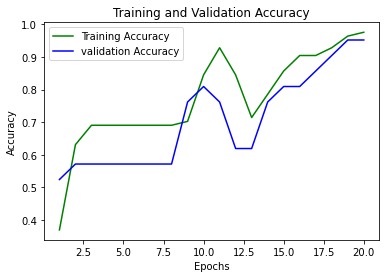

In [27]:
import matplotlib.pyplot as plt
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()